### Machine Learning with Iris Dataset

The "Hello World" of machine learning. Flower classification is a very important, simple, and basic project for any machine learning student.

<img src="flowers.png"/>

### Step 1: Import the necessary packages

numpy is a python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more

pandas is an open source data analysis and manipulation tool, built on top of the Python programming language.

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities.



In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### Step 2: Familiarize yourself with the dataset

In [44]:
# Converts csv to dataframe
df = pd.read_csv('./iris.csv')

In [45]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
# Removes Id column
df.drop(columns='Id', inplace=True)

In [47]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [49]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [50]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Step 3: Data Visualization

#### Histogram

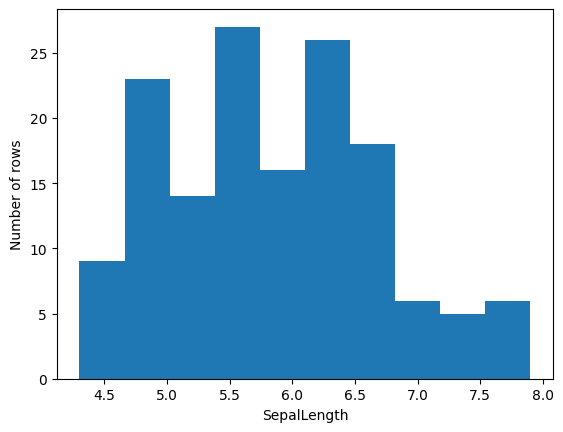

In [51]:
plt.hist(df["SepalLengthCm"])
plt.xlabel("SepalLength")
plt.ylabel("Number of rows")
plt.show()

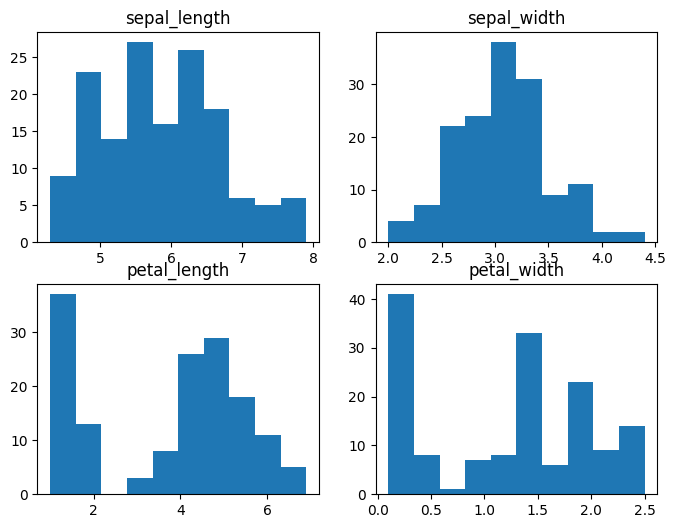

In [52]:
fig, ax = plt.subplots(2,2, figsize=(8,6))

ax[0, 0].hist(df["SepalLengthCm"])
ax[0, 1].hist(df["SepalWidthCm"])
ax[1, 0].hist(df["PetalLengthCm"])
ax[1, 1].hist(df["PetalWidthCm"])

ax[0, 0].set_title("sepal_length")
ax[0, 1].set_title("sepal_width")
ax[1, 0].set_title("petal_length")
ax[1, 1].set_title("petal_width")

plt.show()

#### Scatter Plot

In [53]:
colors = {'Iris-setosa': 'red',
          'Iris-virginica': 'blue',
          'Iris-versicolor': 'green'}

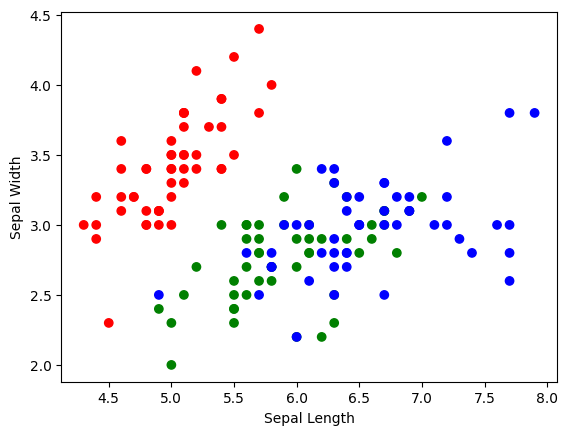

In [54]:
plt.scatter(df["SepalLengthCm"], df["SepalWidthCm"], c=df['Species'].map(colors))
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

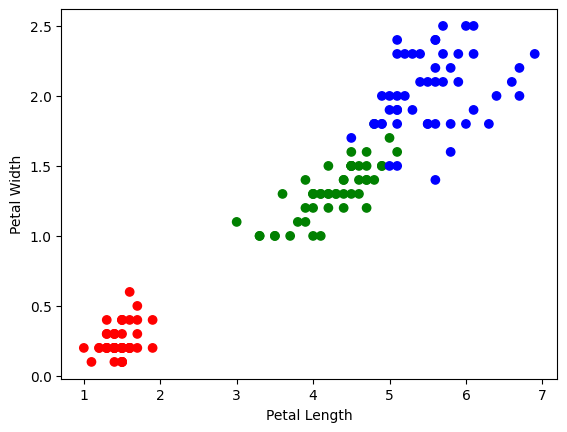

In [55]:
plt.scatter(df["PetalLengthCm"], df["PetalWidthCm"], c=df['Species'].map(colors))
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

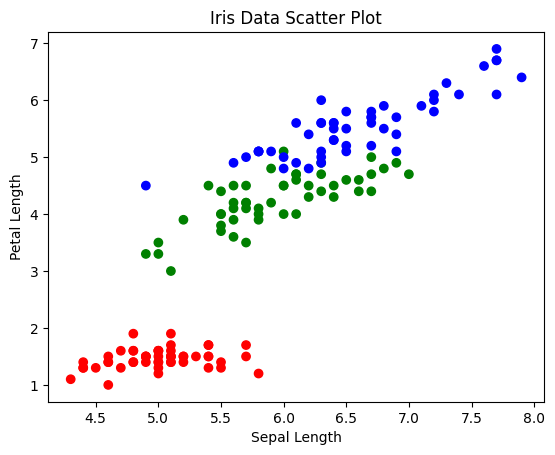

In [56]:
plt.scatter(df["SepalLengthCm"], df["PetalLengthCm"],
            c=df['Species'].map(colors))
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Iris Data Scatter Plot")
plt.show()

### Step 4: Split the dataset into a training set and a testing set

In [57]:
# Array of features
X = df.drop(columns=['Species']).values

# Array of Labels
y = df['Species'].values

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(90, 4)
(90,)
(60, 4)
(60,)


In [61]:
print(X_train)

[[5.  2.  3.5 1. ]
 [6.5 3.  5.2 2. ]
 [6.5 3.  5.8 2.2]
 [6.9 3.1 4.9 1.5]
 [4.6 3.6 1.  0.2]
 [6.6 3.  4.4 1.4]
 [4.9 3.1 1.5 0.1]
 [6.7 3.  5.  1.7]
 [6.7 3.  5.2 2.3]
 [5.6 2.9 3.6 1.3]
 [6.3 3.4 5.6 2.4]
 [5.6 2.7 4.2 1.3]
 [6.1 3.  4.9 1.8]
 [6.3 2.3 4.4 1.3]
 [5.8 2.6 4.  1.2]
 [5.7 3.  4.2 1.2]
 [6.9 3.1 5.4 2.1]
 [6.8 2.8 4.8 1.4]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [4.3 3.  1.1 0.1]
 [4.8 3.4 1.9 0.2]
 [5.2 2.7 3.9 1.4]
 [4.8 3.  1.4 0.3]
 [4.9 3.1 1.5 0.1]
 [7.9 3.8 6.4 2. ]
 [5.  2.3 3.3 1. ]
 [4.6 3.2 1.4 0.2]
 [6.5 3.  5.5 1.8]
 [4.9 3.1 1.5 0.1]
 [6.  2.2 5.  1.5]
 [5.5 2.6 4.4 1.2]
 [5.8 4.  1.2 0.2]
 [5.4 3.9 1.3 0.4]
 [6.4 2.7 5.3 1.9]
 [6.  3.4 4.5 1.6]
 [5.5 2.5 4.  1.3]
 [5.5 4.2 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [6.9 3.2 5.7 2.3]
 [6.  2.9 4.5 1.5]
 [6.1 3.  4.6 1.4]
 [4.6 3.1 1.5 0.2]
 [5.7 2.8 4.5 1.3]
 [6.  3.  4.8 1.8]
 [5.8 2.7 4.1 1. ]
 [4.8 3.4 1.6 0.2]
 [6.  2.2 4.  1. ]
 [6.4 3.1 5.5 1.8]
 [6.7 2.5 5.8 1.8]
 [6.3 3.3 6.  2.5]
 [6.8 3.2 5.9 2.3]
 [5.7 3.8 1.

### Step 5: Create the model

#### Using KneighborsClassifer

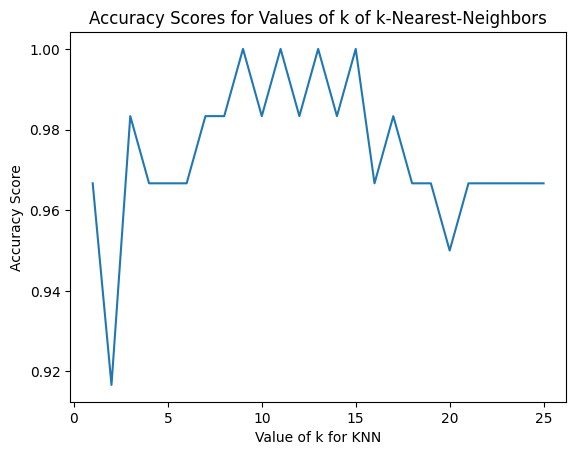

In [64]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []

for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

### Step 6: Test the model using samples that are not in the dataset

#### Predict Using KNN

In [69]:
knn = KNeighborsClassifier(n_neighbors=13)

# Train the model
knn.fit(X_train, y_train)

# Test the model
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

1.0

In [63]:
# make a prediction for an example of an out-of-sample observation
knn.predict([[6, 3, 4, 2]])

array(['Iris-versicolor'], dtype=object)